<a href="https://colab.research.google.com/github/IshantWadhwa4/Machine_Learning/blob/master/Supervisedlearning/LinReg/LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

### Problem Statement 
Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media. Suppose that in our role as Data Scientist we are asked to suggest.

##### Data Source 
'https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv'

#### Data Loading and Basic EDA

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv',index_col=0)

In [0]:
data.info()
#Always consider datatype it is important. 
#Importanly on discreate numeric it is odinal or nominal.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [0]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [0]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Info from above.

1. They use more amount spend on TV as mean is max in all three.

2. TV has very disperse or Scatered data in TV

3. Newspaper has dense data

4. Newspaper has outlire 114

#### Basic EDA

In [0]:
import seaborn as snb

In [0]:
data_corr = data.corr()

In [0]:
data_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


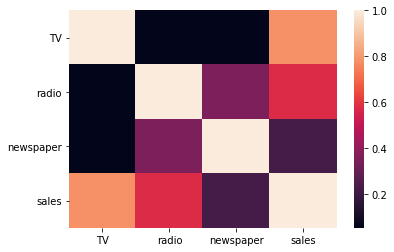

In [0]:
snb.heatmap(data_corr)

From above heat map we get to know the co-relation between tv as sales is high.

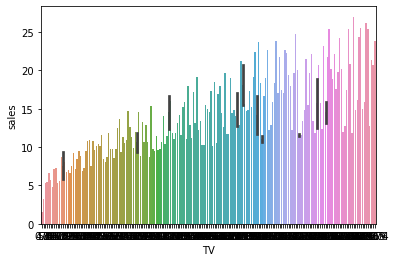

In [0]:
snb.barplot(data=data,x='TV',y='sales')

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


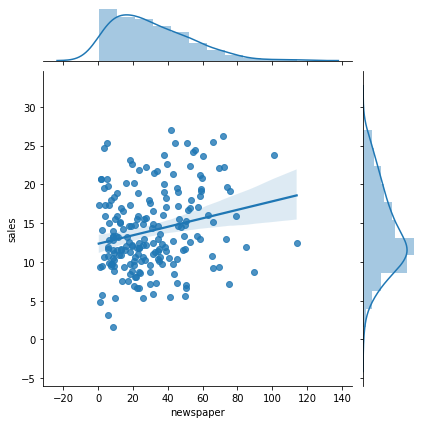

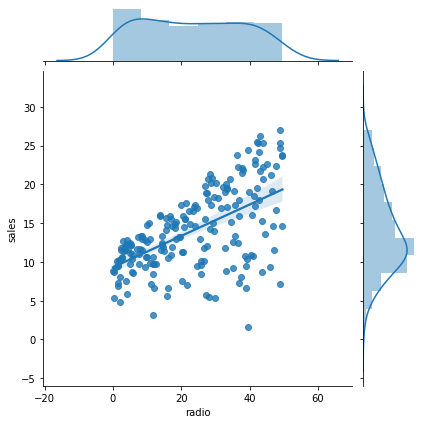

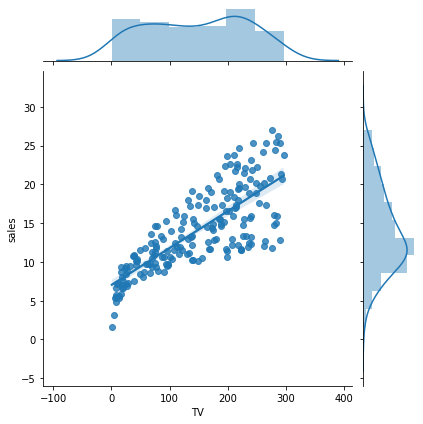

<Figure size 432x288 with 0 Axes>

In [0]:
x1 = sns.jointplot("newspaper",'sales',data = data,kind='reg')
x2 = sns.jointplot("radio",'sales',data = data,kind='reg')
x3 = sns.jointplot("TV",'sales',data = data,kind='reg')

Did you saw the differnce in the obervation we did with .describe method and now TV has the dense data and newspaper has scated so EDA with visulization is imp.

In [5]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


Convert data into test and train 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data[['TV','radio','newspaper']]

In [0]:
y = data['sales']

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 1)

In [17]:
X_train

,TV,radio,newspaper
48,239.9,41.5,18.5
166,234.5,3.4,84.8
195,149.7,35.6,6.0
178,170.2,7.8,35.2
177,248.4,30.2,20.3
...,...,...,...
134,219.8,33.5,45.1
138,273.7,28.9,59.7
73,26.8,33.0,19.3
141,73.4,17.0,12.9


In [18]:
X_test

,TV,radio,newspaper
59,210.8,49.6,37.7
41,202.5,22.3,31.6
35,95.7,1.4,7.4
103,280.2,10.1,21.4
185,253.8,21.3,30.0
199,283.6,42.0,66.2
96,163.3,31.6,52.9
5,180.8,10.8,58.4
30,70.6,16.0,40.8
169,215.4,23.6,57.6


In [20]:
y_train


48     23.2
166    11.9
195    17.3
178    11.7
177    20.2
       ... 
134    19.6
138    20.8
73      8.8
141    10.9
38     14.7
Name: sales, Length: 170, dtype: float64

Model Linear regraion from sklearn

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
linReg = LinearRegression() # base line model for linera regration

In [0]:
linReg = linReg.fit(X_train,y_train)

In [0]:
prdict = linReg.predict(X_test)

In [26]:
prdict

array([21.8561195 , 16.43070013,  7.61358579, 17.81414167, 18.64171793,
       23.81414579, 16.29442126, 13.26019548,  9.10013819, 17.24141586,
       14.3795469 ,  9.89375986, 17.34765633, 16.79371444, 14.88188303,
       15.48747719, 12.40242285, 17.2108581 , 11.28920355, 18.17106497,
        9.35301379, 12.68796292,  8.76659008, 10.48401019, 11.33546207,
       15.00377232,  9.8013108 , 19.48893945, 18.43960804, 17.16086278])

In [0]:
# Model Evaluation with RMSE

In [0]:
from sklearn import metrics

In [31]:
metrics.mean_squared_error(prdict,y_test)

1.8945245763596097

The above model was base line model now we have different differnt perameters we will apply them with the help of 

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True, False]}
linReg = LinearRegression()

In [38]:
model = GridSearchCV(linReg,parameters)
model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
model

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
pre = model.predict(X_test)

In [0]:
rmse = metrics.mean_squared_error(pre,y_test)

In [42]:
rmse

1.8945245763596075

In [43]:
model.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [44]:
model.best_score_

0.8873396135446174

## Handling Categorical Features

In [0]:
# linear regression always work on numerical continuous. 
# the area column is categorical column - nonOrdinal 
  # possible solution -> you conver this to discreat numeircal ; 0,1,2, 
  # the actual solution is to convert numeical descrete to Dummy Variable 
  # Categrical (single col) --> Numerical Discreate (single col) --> Dummy Variable (which projects the categories into axis of vector space) (multiple col)
  # For N Categories, N columns will be created in Dummies. You always need N-1 columns to represent whole data
  # If the inference is important, Use N columns rather than N-1.
  # by default, always do N columns in Dummy. 

In [0]:
import numpy as np

In [0]:
np.random.seed(1256)                                                # set a seed for reproducibility
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_urban = nums > 0.66

In [0]:
data['Area'] = 'rural'
data.loc[mask_urban,'Area'] = 'urban'
data.loc[mask_suburban,'Area'] = 'suburban'

In [10]:
data.head()

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,urban
2,44.5,39.3,45.1,10.4,rural
3,17.2,45.9,69.3,9.3,urban
4,151.5,41.3,58.5,18.5,rural
5,180.8,10.8,58.4,12.9,rural


In [11]:
# convert Area to dummy varibale by one hot encoding
pd.get_dummies(data['Area'])

,rural,suburban,urban
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
...,...,...,...
196,0,0,1
197,1,0,0
198,0,0,1
199,0,1,0


In [0]:
newData = pd.concat([data,pd.get_dummies(data['Area'])],axis=1 )

In [0]:
newData = newData.drop(['Area'],axis=1)

In [14]:
newData

,TV,radio,newspaper,sales,rural,suburban,urban
1,230.1,37.8,69.2,22.1,0,0,1
2,44.5,39.3,45.1,10.4,1,0,0
3,17.2,45.9,69.3,9.3,0,0,1
4,151.5,41.3,58.5,18.5,1,0,0
5,180.8,10.8,58.4,12.9,1,0,0
...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,0,0,1
197,94.2,4.9,8.1,9.7,1,0,0
198,177.0,9.3,6.4,12.8,0,0,1
199,283.6,42.0,66.2,25.5,0,1,0


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
parameters = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True, False]}


In [0]:
linReg = GridSearchCV(LinearRegression(),parameters)

In [0]:
X = newData[['TV','radio','newspaper','rural','suburban','urban']]
y = newData['sales']


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20)

In [20]:
X_test.shape

(40, 6)

In [21]:
linReg.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
linReg.best_score_

0.8799402471495025

In [23]:
linReg.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [0]:
y_predict = linReg.predict(X_test)

In [25]:
y_predict

array([15.00075336,  9.38561843, 18.42839183,  8.64665706, 19.59413681,
       10.50345858, 21.17225835, 10.81892415, 17.05545582, 23.49426394,
       13.97287534,  7.66790132, 11.3532125 ,  9.41578299, 14.6562007 ,
        8.16760906, 10.90900038, 20.81638897, 11.23266914, 10.58417518,
       16.5603901 , 18.51692618, 13.93004294, 15.42530996, 15.71205373,
       13.234129  , 15.87673448, 12.52478754, 21.547749  , 17.35516461,
        7.96479281, 13.05970898, 16.8920272 , 10.33924783, 21.26295496,
        5.61331488, 10.67925336,  7.68862388,  9.07880112, 10.12565647])

In [0]:
from sklearn import metrics

In [0]:
 rmse = metrics.mean_squared_error(y_predict,y_test)

In [28]:
rmse

3.570739844410393

In [0]:
#linReg.coef_